# Monte Carlo and "the power of randomness"

**Fun summer game: throwing pebbles on the sand and estimatiing pi**

- The key idea of this technique is that the ratio of the area of the circle to the square area that inscribes it is $\pi/4$, so by counting the fraction of the random points in the square that are inside the circle, we get increasingly good estimates to $\pi$.

$$\frac{V_{circle}}{V_{square}} = \frac{\pi r^2}{(2r)^2}  = \frac{\pi}{4}$$

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def circle_pi_estimate(N=10000, r0=1):
    """
    Estimate the value of pi using the Monte Carlo method.
    
    Generate N random points in a square with sides ranging from -r0 to r0.
    Count the fraction of points that fall inside the inscribed circle to estimate pi.
    
    Parameters:
    N (int): Number of points to generate (default: 10000)
    r0 (int): Radius of the circle (default: 10)

    Returns:
    float: Estimated value of pi
    """

    # Generate random points
    xs = np.random.uniform(-r0, r0, size=N)
    ys = np.random.uniform(-r0, r0, size=N)

    # Calculate distances from the origin and determine points inside the circle
    inside = np.sqrt(xs**2 + ys**2) < r0
    
    # Compute volume ratio as the ratio of points
    v_ratio = inside.sum() / N

    pi_estimate = 4 * v_ratio
    
    # Plotting
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.plot(xs[inside], ys[inside], 'b.', label='Inside')
    ax.plot(xs[~inside], ys[~inside], 'r.', label='Outside')
    ax.set_title(f"Estimation of $\pi$ = {pi_estimate}", fontsize=20)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.legend()

3.14432

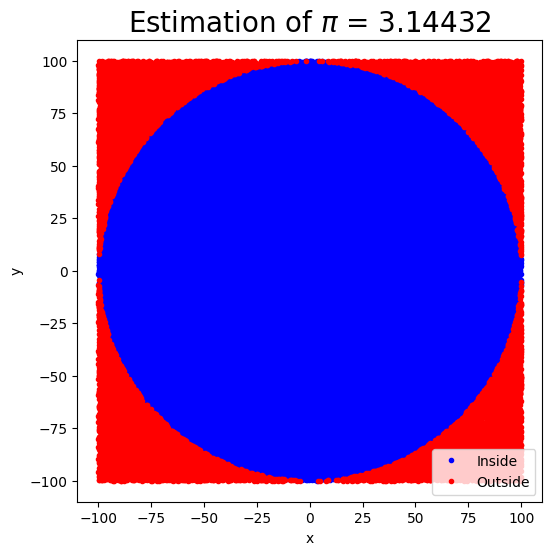

In [14]:
circle_pi_estimate(N=100000, r0=100)

### Shapes more complex than a circle

$$I = e^{-x}+ e^{-x^2} x^2cos(x)^2 + e^{-2x}x^4 cos(2x)^2 $$


- We will now use the same technique but compute a 1D definite integral from $x_1$ to $x_2$ by drawing a rectangle to cover the curve with dimensions $x=[x_1,x_2]$ and $y= [a,b]$. 

- The area of the rectangle is simply $A$=2. The area under the curve is $I$. 
- If we choose a point uniformly at random in the rectangle, What's the probability that the point falls into the region under the curve? It is obviously

$$p = \frac{n_{in}}{N} \approx \frac{I}{A}$$ 

- Thus we can estimate definite integral by drawing N uniform numbers covering range and computing integral as $I = A\frac{n_{in}}{N}$


Text(0, 0.5, 'f(x)')

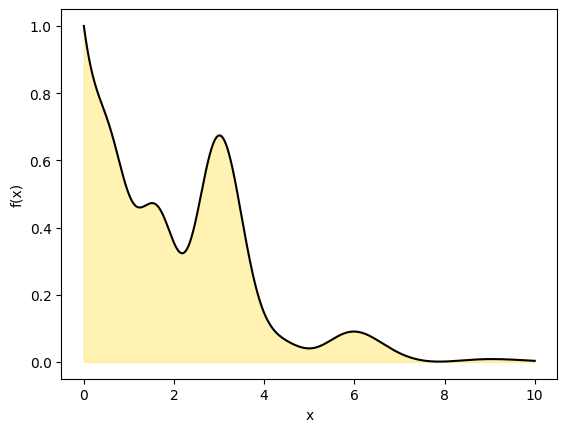

In [64]:
def myfunc1(x):
    return np.exp(-x)+ np.exp(-x)* x**2 * np.cos(x)**2 + np.exp(-2*x)*x**4* np.cos(2*x)**2

x= np.linspace(0, 10, 1000)
y = myfunc1(x)
plt.plot(x,y, c='k')
plt.fill_between(x, y,color='gold',alpha=0.3)
plt.xlabel('x')
plt.ylabel('f(x)')

In [70]:
def mc_integral(func, 
                N=10000, 
                Lx=2, Ly=1, 
                plot=True):
    '''Generate random points in the square with [0, Lx] and [0, Ly]
      Count the fraction of points falling inside the curve
      '''
  
    # Generate uniform random numbers
    ux = Lx*np.random.rand(N) 
    uy = Ly*np.random.rand(N) 

    #Count accepted point.  
    pinside  = uy<func(ux)

    # Total area times fraction of sucessful points
    I = Lx*Ly*pinside.sum()/N 

    if plot==True:
    
      plt.plot(ux[pinside],  uy[pinside],'o', color='red')
      plt.plot(ux[~pinside], uy[~pinside],'o', color='green')

      x = np.linspace(0.001, Lx,100)
      plt.plot(x, func(x), color='black', lw=2)
      plt.title(f'I =  {I:.4f} with N={N} samples',fontsize=12)
      
    return I

Exact result: 2.2898343018663505
MC result: 2.3397


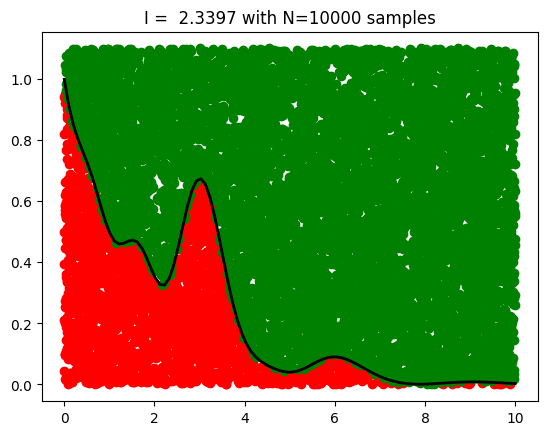

In [106]:
### Calculate integral numerically first
from scipy import integrate

#adjust limits of x and y
Lx = 10  # x range from 0 to Lx
Ly = 1.1 # y range from 0 to Ly

y, err = integrate.quad(myfunc1, 0, Lx)

print("Exact result:", y)

I = mc_integral(myfunc1, N=10000, Lx=Lx, Ly=Ly) 

print("MC result:", I)

### More dimensions 

- Calculate are under 2D Gaussian over [-a, a] and [-b, b] region

$$f(x,y) = \frac{1}{2\pi\sigma_x \sigma_y}e^{-\frac{x^2}{2\sigma^2_x}-\frac{y^2}{2\sigma^2_y} }$$

In [3]:
from scipy.stats import norm

# Parameters
sigma_x = sigma_y = 1
a = b = 3

# Analytical calculation of the integral over [-a, a] x [-b, b]
analytical_integral = (norm.cdf(a, scale=sigma_x) - norm.cdf(-a, scale=sigma_x)) * \
                      (norm.cdf(b, scale=sigma_y) - norm.cdf(-b, scale=sigma_y))

# Monte Carlo integration
N = 1000000  # Number of samples

#TODO replace zeros with expressions
# Generate random samples
x_samples = 0
y_samples = 0

# Evaluate the Gaussian function at these points
f_values = 0

# Calculate the average value and multiply by the area of the rectangle
monte_carlo_integral=0

analytical_integral, monte_carlo_integral

(0.9946076967722628, 0)

#### The Essence of Monte Carlo 

**Transforming Integrals into Expectations!**

- Consider the problem of evaluating an integral I. We can reinterpret this integral as the expectation of a function $g(x)$ under some probability distribution $p(x)$. 

$$
I = \int f(x) \, dx = \int \frac{f(x)}{p(x)} p(x) \, dx = \int g(x) p(x) \, dx = E_p[g]
$$

- Here, $I$ becomes the expected value $g$ with respect to probability distribution p.Thus, we need to generate random points $x_i$ following the distribution $p(x)$. According to the law of large numbers, as we average over many samples, the mean approximates the expected value:

$$
E_p[g] \approx \frac{1}{n} \sum_{i=1}^n g(x_i)\,\,\,where\,\,\,\,\,\, x_i \sim p(x)
$$

**Ordinary MC and uniform random numbers**

- By selecting uniform random numbers in the range [a, b], we adopt $p(x) = \frac{1}{b-a}$ for our samples $x_i$. This justifies our intuitive explanation of "the pebbles on the beach" numerical experiment.

$$
I = (b-a) \cdot \int \frac{f(x)}{b-a} \, dx \approx (b-a) \frac{1}{n} \sum_{i=1}^n g(x_i) = (b-a)\bar{g}_n
$$

In [87]:
def myfunc1(x):
    return np.exp(-x)+ np.exp(-x)* x**2 * np.cos(x)**2 + np.exp(-2*x)*x**4* np.cos(2*x)**2

In [88]:
x0, x1 = 0, 10
N = 100000
x = np.random.uniform(x0, x1, N)

integral = (x1-x0) * np.mean(  myfunc1(x) )

print('MC result', integral)

y, err = integrate.quad(myfunc1, 0, Lx)

print("Exact result:", y)

MC result 2.2876374153624095
Exact result: 2.2898343018663505


#### Why Does Monte Carlo Outperform Brute-Force Integration?

- Using i.i.d. random variables in Monte Carlo (MC) allows us to apply the Central Limit Theorem and infer that the mean we are calculating $\bar{g}$ will have variance proportional to N number of samples $\sigma_N^2 = N\sigma^2_1$ where $\sigma_1$ is variance in single steps. 
- Consequently, the convergence rate of Monte Carlo integration is $\mathcal{O}(n^{-1/2})$, which is notable because it is independent of the number of dimensions of the integral.
- This property gives Monte Carlo an edge over numerical integration methods, which have a convergence rate of $\mathcal{O}(n^{-d})$, especially in moderate- to high-dimensional contexts.
Even in low-dimensional scenarios, Monte Carlo can be advantageous, particularly when the region of interest within the integration space is small. This allows for targeted sampling in critical areas.

#### Example-3 of using Monte Carlo: monitoring the convergence (decresase of variance)

We are often interested in knowing how many iterations it takes for Monte Carlo integration to "converge". To do this, we would like some estimate of the variance, and it is useful to inspect such plots. One simple way to get confidence intervals for the plot of Monte Carlo estimate against number of iterations is simply to do many such simulations.

For the example, we will try to estimate the function (again)

$$
f(x) = x \cos 71 x + \sin 13x, \ \  0 \le x \le 1
$$

Text(0, 0.5, '$f(x)$')

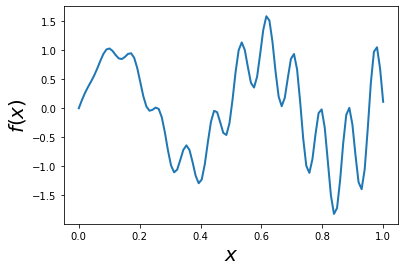

In [32]:
def f(x):
    return x * np.cos(71*x) + np.sin(13*x)

x = np.linspace(0, 1, 100)

plt.plot(x, f(x),linewidth=2.0)


plt.xlabel(r'$x$',fontsize=20)
plt.ylabel(r'$f(x)$',fontsize=20)

- We will vary the sample size from 1 to 100 and calculate the value of $y = \sum{x}/n$ for 1000 replicates. We then plot the 2.5th and 97.5th percentile of the 1000 values of $y$ to see how the variation in $y$ changes with sample size.

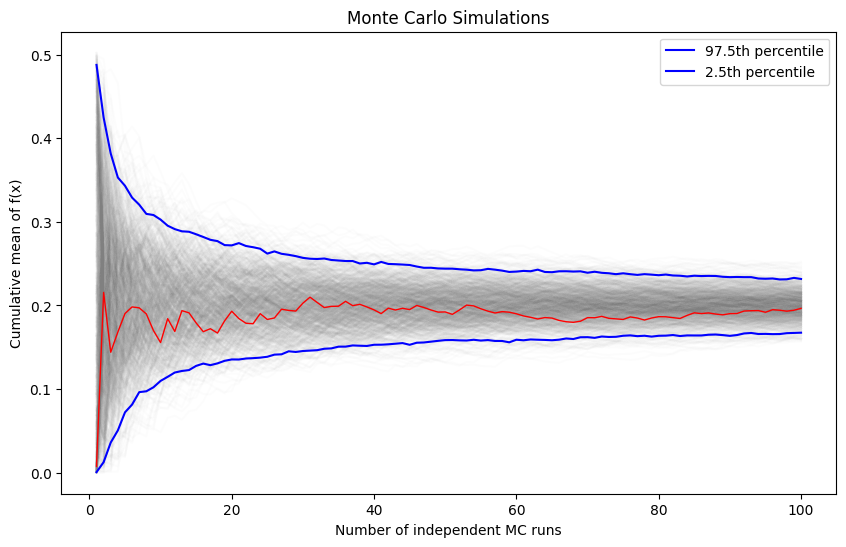

In [81]:
n = 100
reps = 1000

# Generating random numbers and applying the function
fx = f(np.random.random((n, reps)))

# Calculating cumulative mean for each simulation
y = np.cumsum(fx, axis=0) / np.arange(1, n+1)[:, None]

# Calculating the upper and lower percentiles
upper, lower = np.percentile(y, [97.5, 2.5], axis=1)

# Plotting the results
plt.figure(figsize=(10, 6))
for i in range(reps):
    plt.plot(np.arange(1, n+1), y[:, i], c='grey', alpha=0.02)
plt.plot(np.arange(1, n+1), y[:, 0], c='red', linewidth=1)
plt.plot(np.arange(1, n+1), upper, 'b', label='97.5th percentile')
plt.plot(np.arange(1, n+1), lower, 'b', label='2.5th percentile')

plt.xlabel('Number of independent MC runs')
plt.ylabel('Cumulative mean of f(x)')
plt.title('Monte Carlo Simulations')
plt.legend()
plt.show()

### Importance sampling

- Suppose we want to evaluate the following expectation integral with probability distribution $p(x)$

$$
I = \int{h(x)\,p(x) \, dx}
$$

- If it is hard to sample directly from $p$, we can introduce a new density function  $q(x)$ that is easy to sample from, and write

$$
I = \int{h(x)\, p(x)\, dx} = \int{h(x)\, \frac{p(x)}{q(x)} \, q(x) \, dx}
$$

- In other words, we sample from $h(y)$ where $y \sim q$ and weight it by the likelihood ratio $\frac{p(y)}{q(y)}$, estimating the integral as

$$
I \approx \frac{1}{n}\sum_{i=1}^n \frac{p(y_i)}{q(y_i)} h(y_i)
$$

#### Example of importance sampling

Suppose we want to estimate the tail probability of $\mathcal{N}(0, 1)$ for $P(X \gt 5)$. Regular MC integration using samples from $\mathcal{N}(0, 1)$ is hopeless since nearly all samples will be rejected. However, we can use the exponential density truncated at 5 as the importance function and use importance sampling. Note that $h$ here is simply the identify function.


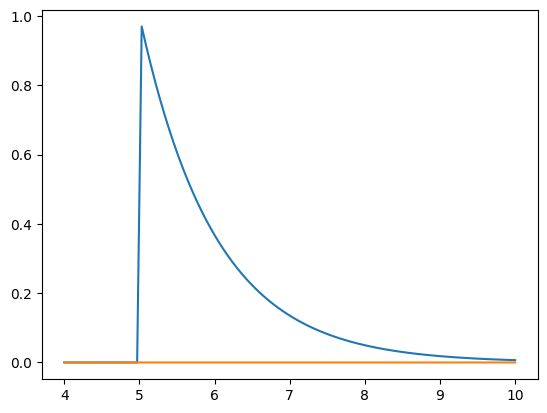

In [91]:
x = np.linspace(4, 10, 100)
plt.plot(x, sci.stats.expon(5).pdf(x))
plt.plot(x, sci.stats.norm().pdf(x))

We expect about 3 draws out of 10,000,000 from $\mathcal{N}(0, 1)$ to have a value greater than 5. Hence simply sampling from $\mathcal{N}(0, 1)$ is hopelessly inefficient for Monte Carlo integration.

In [92]:
v_true = 1 - sci.stats.norm().cdf(5)
v_true

2.866515719235352e-07

In [93]:
# using direct sampling with p(x)=N(0,1)

n = 10000
y = sci.stats.norm().rvs(n)
v_mc = 1.0/n * np.sum(y > 5)

# estimate and relative error
print('Direct MC & error:', v_mc, np.abs(v_mc - v_true)/v_true)

# using importance sampling with p(x)=exp(x)
n = 10000
y = sci.stats.expon(loc=5).rvs(n)
v_is = 1.0/n * np.sum(sci.stats.norm().pdf(y)/sci.stats.expon(loc=5).pdf(y))

# estimate and relative error
print('Direct IS MC & error:',v_is, np.abs(v_is- v_true)/v_true)

Direct MC & error: 0.0 1.0
Direct IS MC & error: 2.870785329809864e-07 0.0014894774676662806


#### Using Monte Carlo to sample probability distributions

- Another application of a simple MC technique is to turn uniformly distributed random numbers into random numbers sampled according to different probability distributions.
- The key is to employ **rejection criteria**; if points go under the curve, they are accepted, hence generating a probability distribution 

In [ ]:
def mc_randnum_sample(func, N=10000, Lx=1, Ly=1):
    '''Sample random variables according to a distribution.
    func: given prob dist
    N:    random numbers used for sampling and rejection
    Lx, Ly range and domain size of distribution
    '''

    # uniform random samples
    ux =     Lx*np.random.rand(10000)
    uy =     Ly*np.random.rand(10000)  

    #rejection criteria
    idx = uy<=func(ux)          
    
    sampled_ux = ux[idx]

    ### Plotting    
    x = np.linspace(0, Lx, 100)

    plt.plot(x, func(x), lw=3)
    plt.hist(sampled_ux, density=True)

### Markov Chain Monte Carlo

In [108]:
def mcmc_pi(N=1e5, delta=1.0): 
    '''Using MCMC algorithm to estimate the value of pi'''
    
    pts = [] # array for points in square
    
    r_old = np.random.uniform(-1, 1, size=2) # 2 points within [0, 1] for x and y

    for i in range(N):
        
        dr = np.random.uniform(-delta, delta, size=2)
        
        r_new = r_old + dr
        
        if np.max(r_new) <= 1.0 and np.min(r_new) >= -1.0: # reject moves outside
            
            pts.append(r_new)
            
            r_old = r_new
    
    pts  = np.array(pts)
    hits = pts[np.sqrt(pts[:,0]**2+pts[:,1]**2) < 1]
    
    return 4 * len(hits) / len(pts)

In [112]:
pi_value =  mcmc_pi(N=100000, delta=1) # vary delta to get better estimates 

print("Estimated Pi value is: ", pi_value)

Estimated Pi value is:  3.1435847932797962


Text(0.5, 1.0, 'Mean: 3.4336, Var: 0.1834')

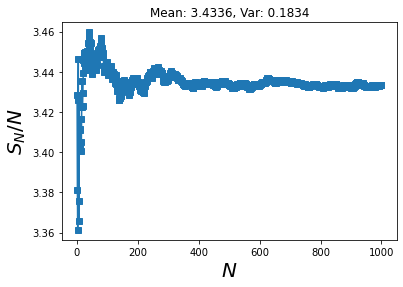

In [38]:
n_runs = np.arange(1,1001)
N = 100

#Estimate pi via a number of mcmc simulations
pi_vals      =  np.array([mcmc_pi(N) for i in n_runs] )
 
# Calculaate how mean improves with number of runs
sample_mean = np.cumsum(pi_vals )/n_runs

plt.plot(n_runs, sample_mean, '-s')

plt.xlabel('$N$',fontsize=20)
plt.ylabel('$S_N/N$', fontsize=20)

plt.title( f"Mean: {np.mean(pi_vals ):.4f}, Var: {np.std(pi_vals ):.4f}" )

### Problems

#### MC, the crude version

Evaluate the following integral $\int^{\infty}_0 \frac{e^{-x}}{1+(x-1)^2} dx$ using Monte Carlo methods. 
- Start by doing a direct monte carlo on uniform interval. 
- Try an importance sampling approach using en exponential probability distribution. 
- Find the optimal value of $\lambda $ that gives the most rapid reduction of variance [Hint: experiment with different values of $\lambda$]

#### MC integral of 3D and 6D spheres!

- Generalize the MC code above for computing the volume of 3D and 6D spheres. 
- The analytical results are known: $V_{3d}=\frac{4}{3}\pi r^3$ and $V_{3d}=\frac{1}{6}\pi \pi^3 r^6$. So you can check the statistical error made in the simulations. 